## Jasmine Young
## March 3rd, 2022
# AIPI Homework 3

In [1]:
#Import My Cloned Github Repository
!pip install git+https://github.com/jgy4/d3rlpy

  Cloning https://github.com/jgy4/d3rlpy to /tmp/pip-req-build-1dmt15v2
  Running command git clone -q https://github.com/jgy4/d3rlpy /tmp/pip-req-build-1dmt15v2
     |████████████████████████████████| 125 kB 19.4 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
  Created wheel for d3rlpy: filename=d3rlpy-1.0.0-cp37-cp37m-linux_x86_64.whl size=902586 sha256=e11914611c7a7e19f2d5115cd67af8f21672291b8d5ac1e18408a12ba940a0aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-w6_vqoye/wheels/7c/a8/d8/b1eabe298a3128bd24d21f7aee832edfe034566baa3b98fcb4
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=f2a415c189e5b31160189a29ab03c497612c09e9479cb6aca4c49e16343dc9a8
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built d3rlpy GPUtil


# Train CQL

We choose the cartpole environment.

In [2]:
import d3rlpy
from d3rlpy.datasets import get_pendulum # Pendulum-v0 dataset
from sklearn.model_selection import train_test_split
from d3rlpy.datasets import get_cartpole
import matplotlib.pyplot as plt

#Prepare dataset and environment
dataset, env = get_cartpole()

Donwloading cartpole.pkl into d3rlpy_data/cartpole_replay_v1.1.0.h5...


We train our CQL Agent with the data from the behavior policy.

In [3]:
from d3rlpy.algos import DiscreteCQL
from d3rlpy.metrics.scorer import initial_state_value_estimation_scorer

cql = DiscreteCQL(use_gpu=False)

# split dataset
train_episodes, test_episodes = train_test_split(dataset, test_size=0.3)

# start training
cql.fit(train_episodes,
        eval_episodes=test_episodes,
        n_epochs=10,
        scorers={
            'intial_value': initial_state_value_estimation_scorer
        })


2022-03-04 01:13.05 [debug    ] RoundIterator is selected.
2022-03-04 01:13.05 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20220304011305
2022-03-04 01:13.05 [debug    ] Building models...
2022-03-04 01:13.05 [debug    ] Models have been built.
2022-03-04 01:13.05 [info     ] Parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DiscreteCQL', 'observation

Epoch 1/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:13.22 [info     ] DiscreteCQL_20220304011305: epoch=1 step=2159 epoch=1 metrics={'time_sample_batch': 0.00022118817108988264, 'time_algorithm_update': 0.006960831068356096, 'loss': 0.6879488375243239, 'time_step': 0.00744967959776362, 'intial_value': 1.020194172859192} step=2159
2022-03-04 01:13.22 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_2159.pt


Epoch 2/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:13.33 [info     ] DiscreteCQL_20220304011305: epoch=2 step=4318 epoch=2 metrics={'time_sample_batch': 0.00012775558517618608, 'time_algorithm_update': 0.0042399219364521405, 'loss': 0.6674529144807014, 'time_step': 0.004460602349956702, 'intial_value': 1.014544129371643} step=4318
2022-03-04 01:13.33 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_4318.pt


Epoch 3/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:13.43 [info     ] DiscreteCQL_20220304011305: epoch=3 step=6477 epoch=3 metrics={'time_sample_batch': 0.00012767110615209497, 'time_algorithm_update': 0.004225411532156, 'loss': 0.6653827949771731, 'time_step': 0.004445449573787179, 'intial_value': 1.014491081237793} step=6477
2022-03-04 01:13.43 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_6477.pt


Epoch 4/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:13.54 [info     ] DiscreteCQL_20220304011305: epoch=4 step=8636 epoch=4 metrics={'time_sample_batch': 0.00012799102214267267, 'time_algorithm_update': 0.004249599367559591, 'loss': 0.6708130824063431, 'time_step': 0.004469249357830434, 'intial_value': 2.0705296993255615} step=8636
2022-03-04 01:13.54 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_8636.pt


Epoch 5/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:14.05 [info     ] DiscreteCQL_20220304011305: epoch=5 step=10795 epoch=5 metrics={'time_sample_batch': 0.00013128548322203205, 'time_algorithm_update': 0.004304733139433867, 'loss': 0.6735252175081544, 'time_step': 0.004529874597560923, 'intial_value': 2.070434331893921} step=10795
2022-03-04 01:14.05 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_10795.pt


Epoch 6/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:14.15 [info     ] DiscreteCQL_20220304011305: epoch=6 step=12954 epoch=6 metrics={'time_sample_batch': 0.00012876325980995252, 'time_algorithm_update': 0.004261420578137213, 'loss': 0.6727305012149024, 'time_step': 0.004482035396164244, 'intial_value': 2.0700325965881348} step=12954
2022-03-04 01:14.15 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_12954.pt


Epoch 7/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:14.26 [info     ] DiscreteCQL_20220304011305: epoch=7 step=15113 epoch=7 metrics={'time_sample_batch': 0.00012835290157005378, 'time_algorithm_update': 0.00426753962023383, 'loss': 0.6721978116609698, 'time_step': 0.004491249793875598, 'intial_value': 2.066821813583374} step=15113
2022-03-04 01:14.26 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_15113.pt


Epoch 8/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:14.37 [info     ] DiscreteCQL_20220304011305: epoch=8 step=17272 epoch=8 metrics={'time_sample_batch': 0.00014016759677196113, 'time_algorithm_update': 0.0046332920519717045, 'loss': 0.68407745342555, 'time_step': 0.004873124467603252, 'intial_value': 3.0723390579223633} step=17272
2022-03-04 01:14.37 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_17272.pt


Epoch 9/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:14.47 [info     ] DiscreteCQL_20220304011305: epoch=9 step=19431 epoch=9 metrics={'time_sample_batch': 0.00012331993947596725, 'time_algorithm_update': 0.004192551289956401, 'loss': 0.6865191584993922, 'time_step': 0.00441495651114368, 'intial_value': 3.0922842025756836} step=19431
2022-03-04 01:14.47 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_19431.pt


Epoch 10/10:   0%|          | 0/2159 [00:00<?, ?it/s]

2022-03-04 01:14.58 [info     ] DiscreteCQL_20220304011305: epoch=10 step=21590 epoch=10 metrics={'time_sample_batch': 0.00012861947982385237, 'time_algorithm_update': 0.00424188935905764, 'loss': 0.6859531520472019, 'time_step': 0.004467977534405, 'intial_value': 3.0909552574157715} step=21590
2022-03-04 01:14.58 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20220304011305/model_21590.pt


[(1,
  {'intial_value': 1.020194172859192,
   'loss': 0.6879488375243239,
   'time_algorithm_update': 0.006960831068356096,
   'time_sample_batch': 0.00022118817108988264,
   'time_step': 0.00744967959776362}),
 (2,
  {'intial_value': 1.014544129371643,
   'loss': 0.6674529144807014,
   'time_algorithm_update': 0.0042399219364521405,
   'time_sample_batch': 0.00012775558517618608,
   'time_step': 0.004460602349956702}),
 (3,
  {'intial_value': 1.014491081237793,
   'loss': 0.6653827949771731,
   'time_algorithm_update': 0.004225411532156,
   'time_sample_batch': 0.00012767110615209497,
   'time_step': 0.004445449573787179}),
 (4,
  {'intial_value': 2.0705296993255615,
   'loss': 0.6708130824063431,
   'time_algorithm_update': 0.004249599367559591,
   'time_sample_batch': 0.00012799102214267267,
   'time_step': 0.004469249357830434}),
 (5,
  {'intial_value': 2.070434331893921,
   'loss': 0.6735252175081544,
   'time_algorithm_update': 0.004304733139433867,
   'time_sample_batch': 0.0001

Generate True Q vs. Training Steps Plot

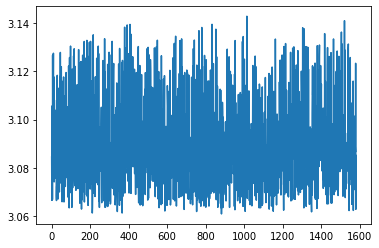

In [4]:
#Loop Through Episodes To Capture True Q-Values
actual_q = []
for i in range(0,len(dataset.episodes)):
  x = initial_state_value_estimation_scorer(cql,dataset.episodes[i:i+1])
  actual_q.append(x)

#Plot True Q-Values
plt.plot(actual_q)

Generate Estimated Q vs. Training Steps Plot

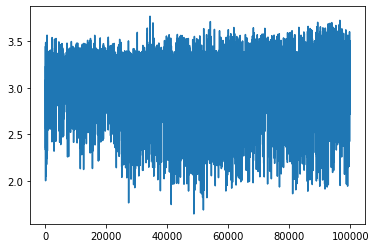

In [5]:
#Use trained model to generate estimated q-values
q_est = cql.predict_value(dataset.observations, dataset.actions)

#Plot Estimated Q-Values
plt.plot(q_est)

## Compare Estimated Q to Real Q for CQL

For our CQL model the estimated q-values cover a wider range than the actual q-values. They range from under 2.0 to over 3.5. Our actual q-values hover right around 3.1 and only vary from 3.05 to 3.15. 

# Train OPE (FQE)

In [6]:
from d3rlpy.ope import DiscreteFQE
from d3rlpy.metrics.scorer import evaluate_on_environment
from d3rlpy.metrics.scorer import soft_opc_scorer

dataset, env = get_cartpole()

train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

fqe = DiscreteFQE(algo=cql,
                  q_func_factory='qr',
                  learning_rate=1e-4,
                  scaler='pixel',
                  n_frames=4,
                  discrete_action=True,
                  use_gpu=False)
fqe.fit(dataset.episodes,
        eval_episodes=dataset.episodes,
        n_epochs=10,
        scorers={
            'initial_value': initial_state_value_estimation_scorer,
        })

2022-03-04 01:15.01 [warning  ] Unused arguments are passed.   discrete_action=True
2022-03-04 01:15.01 [debug    ] RoundIterator is selected.
2022-03-04 01:15.01 [info     ] Directory is created at d3rlpy_logs/DiscreteFQE_20220304011501
2022-03-04 01:15.01 [debug    ] Fitting scaler...              scaler=pixel
2022-03-04 01:15.01 [debug    ] Building models...
2022-03-04 01:15.01 [debug    ] Models have been built.
2022-03-04 01:15.01 [info     ] Parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/params.json params={'action_scaler': None, 'batch_size': 100, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_critics': 1, 'n_frames': 4, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'qr', 'params': {'share_encoder': False, 'n_qua

Epoch 1/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:15.13 [info     ] DiscreteFQE_20220304011501: epoch=1 step=997 epoch=1 metrics={'time_sample_batch': 0.00031060153766046674, 'time_algorithm_update': 0.009224535110840947, 'loss': 2.7836780882362975, 'time_step': 0.009679361475386854, 'initial_value': 8.244741439819336} step=997
2022-03-04 01:15.13 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_997.pt


Epoch 2/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:15.25 [info     ] DiscreteFQE_20220304011501: epoch=2 step=1994 epoch=2 metrics={'time_sample_batch': 0.0003325173943308196, 'time_algorithm_update': 0.009383203033937016, 'loss': 8.071643895825508, 'time_step': 0.009856970881746191, 'initial_value': 15.261547088623047} step=1994
2022-03-04 01:15.25 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_1994.pt


Epoch 3/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:15.37 [info     ] DiscreteFQE_20220304011501: epoch=3 step=2991 epoch=3 metrics={'time_sample_batch': 0.00031167956269014565, 'time_algorithm_update': 0.009371221603577212, 'loss': 15.256864342072543, 'time_step': 0.009788115261311278, 'initial_value': 21.24956512451172} step=2991
2022-03-04 01:15.37 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_2991.pt


Epoch 4/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:15.52 [info     ] DiscreteFQE_20220304011501: epoch=4 step=3988 epoch=4 metrics={'time_sample_batch': 0.00041362084261512564, 'time_algorithm_update': 0.011763648977250967, 'loss': 22.84691808120896, 'time_step': 0.012342757423041218, 'initial_value': 26.340373992919922} step=3988
2022-03-04 01:15.52 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_3988.pt


Epoch 5/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:16.05 [info     ] DiscreteFQE_20220304011501: epoch=5 step=4985 epoch=5 metrics={'time_sample_batch': 0.00033294018675594653, 'time_algorithm_update': 0.009762997373774155, 'loss': 28.070562029793603, 'time_step': 0.010202968132531751, 'initial_value': 30.919879913330078} step=4985
2022-03-04 01:16.05 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_4985.pt


Epoch 6/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:16.17 [info     ] DiscreteFQE_20220304011501: epoch=6 step=5982 epoch=6 metrics={'time_sample_batch': 0.0003113639031872228, 'time_algorithm_update': 0.009228075279993423, 'loss': 34.80928632608029, 'time_step': 0.009648262796813292, 'initial_value': 34.87467956542969} step=5982
2022-03-04 01:16.17 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_5982.pt


Epoch 7/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:16.29 [info     ] DiscreteFQE_20220304011501: epoch=7 step=6979 epoch=7 metrics={'time_sample_batch': 0.0003108117381930949, 'time_algorithm_update': 0.009436978021619791, 'loss': 40.41960099850638, 'time_step': 0.009857367130076754, 'initial_value': 38.37641906738281} step=6979
2022-03-04 01:16.29 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_6979.pt


Epoch 8/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:16.41 [info     ] DiscreteFQE_20220304011501: epoch=8 step=7976 epoch=8 metrics={'time_sample_batch': 0.0003141431416288661, 'time_algorithm_update': 0.009233417817080392, 'loss': 44.02423582392686, 'time_step': 0.009663455584343362, 'initial_value': 41.409942626953125} step=7976
2022-03-04 01:16.41 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_7976.pt


Epoch 9/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:16.53 [info     ] DiscreteFQE_20220304011501: epoch=9 step=8973 epoch=9 metrics={'time_sample_batch': 0.00031698431629115866, 'time_algorithm_update': 0.009502931248579724, 'loss': 48.7620843755326, 'time_step': 0.00993618850363652, 'initial_value': 44.115516662597656} step=8973
2022-03-04 01:16.53 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_8973.pt


Epoch 10/10:   0%|          | 0/997 [00:00<?, ?it/s]

2022-03-04 01:17.09 [info     ] DiscreteFQE_20220304011501: epoch=10 step=9970 epoch=10 metrics={'time_sample_batch': 0.00041492461201659176, 'time_algorithm_update': 0.012350260314635313, 'loss': 52.01223348925561, 'time_step': 0.012981358119692941, 'initial_value': 46.52616500854492} step=9970
2022-03-04 01:17.09 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteFQE_20220304011501/model_9970.pt


[(1,
  {'initial_value': 8.244741439819336,
   'loss': 2.7836780882362975,
   'time_algorithm_update': 0.009224535110840947,
   'time_sample_batch': 0.00031060153766046674,
   'time_step': 0.009679361475386854}),
 (2,
  {'initial_value': 15.261547088623047,
   'loss': 8.071643895825508,
   'time_algorithm_update': 0.009383203033937016,
   'time_sample_batch': 0.0003325173943308196,
   'time_step': 0.009856970881746191}),
 (3,
  {'initial_value': 21.24956512451172,
   'loss': 15.256864342072543,
   'time_algorithm_update': 0.009371221603577212,
   'time_sample_batch': 0.00031167956269014565,
   'time_step': 0.009788115261311278}),
 (4,
  {'initial_value': 26.340373992919922,
   'loss': 22.84691808120896,
   'time_algorithm_update': 0.011763648977250967,
   'time_sample_batch': 0.00041362084261512564,
   'time_step': 0.012342757423041218}),
 (5,
  {'initial_value': 30.919879913330078,
   'loss': 28.070562029793603,
   'time_algorithm_update': 0.009762997373774155,
   'time_sample_batch':

Generate True Q vs. Training Steps Plot

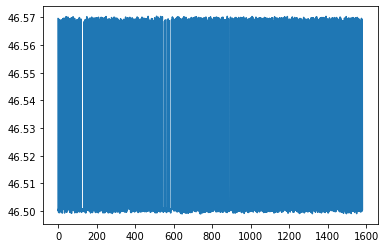

In [7]:
#Loop Through Episodes To Capture True Q-Values
actual_q = []
for i in range(0,len(dataset.episodes)):
  x = initial_state_value_estimation_scorer(fqe,dataset.episodes[i:i+1])
  actual_q.append(x)

#Plot True Q-Values
plt.plot(actual_q)

Generate Estimated Q vs. Training Steps Plot

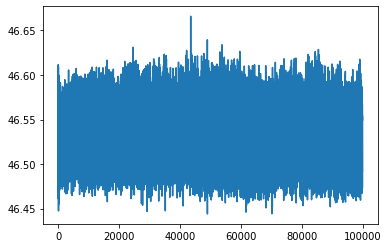

In [8]:
q_est = fqe.predict_value(dataset.observations, dataset.actions)

plt.plot(q_est)

## Compare Estimated Q to Real Q for FQE

For our FQE model the estimated q-values cover a wider range than the actual q-values. They range from under 46.45 to nearly 46.65. Our actual q-values only vary from 46.50 to 46.57. 